# Model Comparision

This Notebook is a part of the Thesis Project: Learning Multilingual Document Representations.
(Marc Lenz, 2021)


** **

##  1. Create the LSI Models/SVD for Preprocessed Data

The original JRC-Arquis dataset have been preprocessed before. 
The aligned documents have been saved in two seperate csv files. 
For details of the preprocessing, check: read_and_preprocess.py

In [ ]:
!git clone https://github.com/marc-lenz/thesis_code.git

Cloning into 'thesis_code'...
remote: Enumerating objects: 123, done.
remote: Counting objects: 100% (123/123), done.
remote: Compressing objects: 100% (99/99), done.
remote: Total 123 (delta 58), reused 86 (delta 23), pack-reused 0
Receiving objects: 100% (123/123), 26.33 MiB | 20.93 MiB/s, done.
Resolving deltas: 100% (58/58), done.


In [ ]:
dataset = "EU-Bookshop"
languages = ["es", "en", "fr"] #["hu","cs",'de','en','nl',"pl", "fr", "pt"]

In [ ]:
from google.colab import drive
import pandas as pd 
import numpy as np
import pickle

drive.mount("/content/gdrive")

if dataset == "JRC_Arquis" :
  main_dir = "/content/gdrive/My Drive/Thesis/JRC_Arquis_files/"
  sample_df = pd.read_pickle(main_dir+"sample_df_preprocessed.pkl")
  
elif dataset == "EU-Bookshop": 
  main_dir = "/content/gdrive/My Drive/Thesis/EU-BookShop Files/"
  #define

  def get_eub_dataframe(main_dir):
    def load(filepath):
      with open(filepath,"rb") as f:
          obj = pickle.load(f)
      return obj
    tokenized_en = load(main_dir+"/tokenized_en.list")
    tokenized_fr = load(main_dir+"/tokenized_fr.list")
    tokenized_es = load(main_dir+"/tokenized_es.list")
    sample_df = pd.DataFrame()
    sample_df["body_pre_en"] = tokenized_en
    sample_df["body_pre_fr"] = tokenized_fr
    sample_df["body_pre_es"] = tokenized_es
    #erase empty lists
    for key in sample_df.keys():
      sample_df = sample_df[sample_df.astype(str)[key] != '[]']
    return sample_df

  sample_df = get_eub_dataframe(main_dir)[:5000]

Mounted at /content/gdrive


In [ ]:
def get_frequencies(dictionary, corpus):
  word_counts = {key:0 for key in dictionary.keys()}

  for doc in corpus:
    for word_tuple in doc:
      index = word_tuple[0]
      count = word_tuple[1]
      word_counts[index] = word_counts[index]+ count

  return np.sort(list(word_counts.values()))

In [ ]:
from gensim import corpora
from thesis_code.Preprocessor import Preprocessor

p = Preprocessor(language="general")
#Preprocessing of texts, get general statistics

token_counts = []
voc_counts = []
corpi = []
frequencies = []
dictionaries = []
for i in languages:
  texts = sample_df["body_pre_"+i]
  dictionary = corpora.Dictionary(texts)
  dictionaries.append(dictionary)
  token_num = dictionary.num_pos
  unique_words = len(dictionary.keys())
  token_counts.append(token_num)
  voc_counts.append(unique_words)
  corpus = [dictionary.doc2bow(text) for text in texts]
  corpi.append(corpus)
  frequencies.append(get_frequencies(dictionary, corpus))

General, descriptive plots

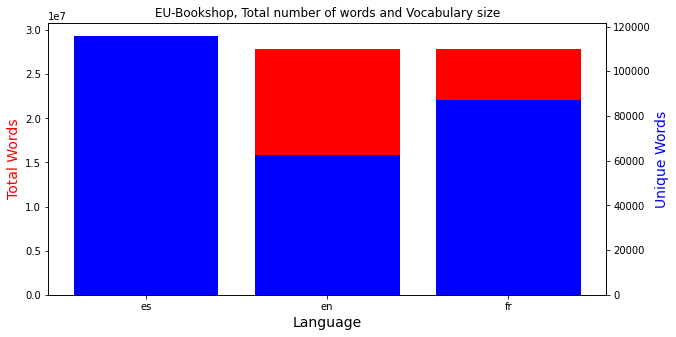

In [ ]:
from matplotlib import pyplot as plt
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(10,5))
# make a plot
ax.bar(languages, token_counts, color="red")
# set x-axis label
ax.set_xlabel("Language",fontsize=14)
# set y-axis label
ax.set_ylabel("Total Words",color="red",fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.bar(languages, voc_counts,color="blue")
ax2.set_ylabel("Unique Words",color="blue",fontsize=14)
plt.title("{}, Total number of words and Vocabulary size".format(dataset))
plt.show()



In [ ]:
doc_lengths = [k for k in doc_lengths if k>10]

In [ ]:
len(doc_lengths)

2806

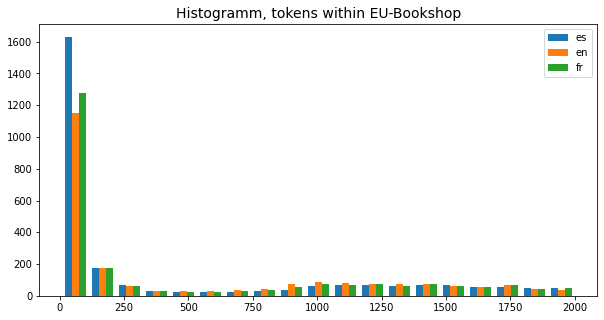

In [ ]:
plt.figure(figsize=(10,5))
lin_hists =[]
for k in range(len(languages)):
  doc_lengths = [len(doc) for doc in corpi[k]]
  lin_hists.append(doc_lengths)

bins = np.linspace(10, 2000, 20)
plt.hist(lin_hists, bins, label=languages)
plt.title("Histogramm, tokens within {}".format(dataset), fontsize=14)
plt.legend()

Text(0.5, 1.0, 'Word Length Distribution, Vocabulary')

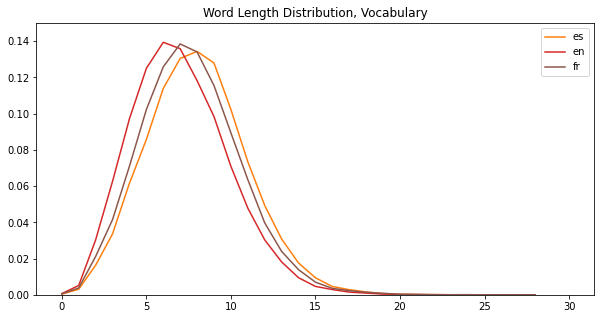

In [ ]:
plt.figure(figsize=(10,5))
hist_wl = []
for k in range(len(dictionaries)):
  d = dictionaries[k]
  vocab = d.values()
  word_lengths = [len(w) for w in vocab]
  a = plt.hist(word_lengths, bins = np.linspace(0,30,30), alpha=0.0)
  plt.plot(a[0]/np.sum(a[0]),  label=languages[k])
  plt.ylim(0, 0.15)
plt.legend()
plt.title("Word Length Distribution, Vocabulary")


In [ ]:
plt.figure(figsize=(12,8))
for k in range(len(frequencies)):
  frequency = frequencies[k]

  plt.plot(np.arange(len(frequency)),np.flip(frequency), label= languages[k])
  plt.xlabel("Rank of Word")
  plt.ylabel("Frequency of Word")
  plt.ylim(0,1000)
  plt.title("Zipfs law")
plt.legend()


plt.figure(figsize=(12,8))
for k in range(len(frequencies)):
  frequency = frequencies[k]

  plt.plot(np.arange(len(frequency)),np.flip(frequency), label= languages[k])
  plt.ylim(0,100)
plt.legend()

In [ ]:
rare_words = []
common_words = []
for k in range(len(frequencies)):
  rare_words.append((frequencies[k] <= 20).sum())
  common_words.append((frequencies[k] > 2000).sum())